# Mini-Projet 4 #

In [3]:
#Pour les imports diverses :

import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize


### 1.Étude du problème d'otpimisation ###

1. Soit $$f : z \mapsto \frac{1}{2} || z - z_b ||_2^2 + \sum_{(i,j)}|| \nabla z(i,j)||_2^2$$

$f$ est la fonction coût à minimiser par rapport à l'image bruitée $z_b$.

Les variables de décisions sont les coordonnées de la matrice $z$, au nombre de $n \times m$.

Tous les pixels devant en outre être compris entre $0$ et $1$, le vecteur contrainte $c(z)$ contient l'ensemble des coordonnées de $z$ avec $$\forall (i,j) \in \mathbb{R}^{n}\times \mathbb{R}^{m} c_{i,j}= u_{i,j}-1 \text{ et } c_{n+i,m+j}=-u_{n+i,m+j}$$
Il y a donc $2n\times 2m=4nm$ contraintes. 

2. f est convexe et différentiable comme la somme et la composition de fonctions quadratiques et différentiables. 

3. Montrons que $$ \nabla f  = u - u_b - 2\text{div}(\nabla u) = u - u_b - 2\Delta u$$

$\red{\text{À  COMPLÉTER}}$

### 2. Résolution numérique ###

Text(0.5, 1.0, 'Image Bruitée')

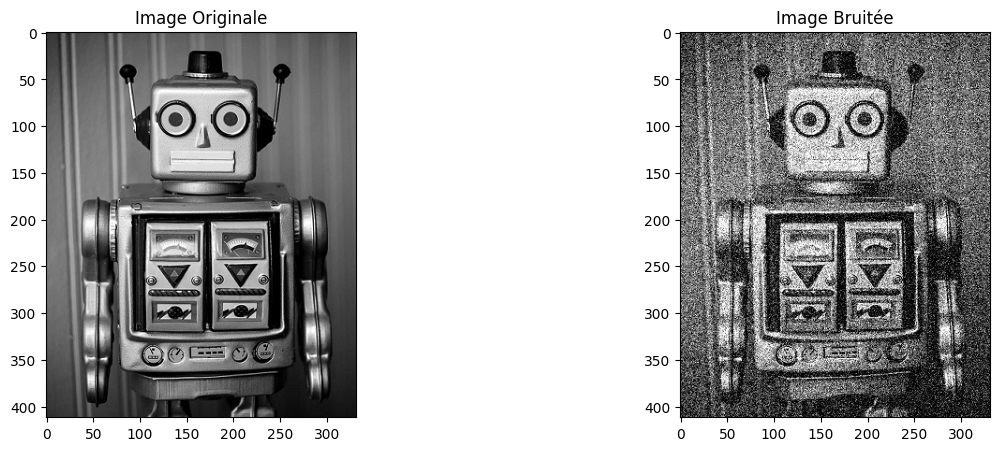

In [7]:
#Pour les questions 4 à 7

imgR0 = plt.imread("robot_no_noise.jpg")
imgR = imgR0[:, :, 0] / 255
imgRB0 = plt.imread("robot_noise.jpg")
imgRB = imgRB0[:, :, 0] / 255


fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].imshow(imgR,cmap='gray')
axes[0].set_title("Image Originale")
axes[1].imshow(imgRB,cmap='gray')
axes[1].set_title("Image Bruitée")



Text(0.5, 1.0, 'Laplacien')

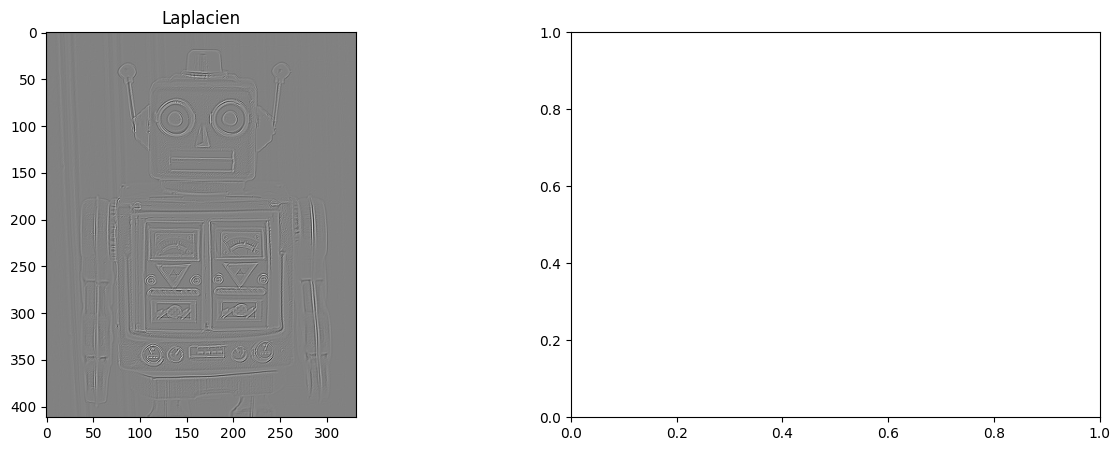

In [11]:
## Q4 grad, div et laplacien
def grad(u):
    n, m = u.shape[0], u.shape[1]

    dux = u[1:, :] - u[:-1, :]
    dux = np.concatenate((dux, np.zeros((1, m))), axis=0)
    duy = u[:, 1:] - u[:, :-1]
    duy = np.concatenate((duy, np.zeros((n, 1))), axis=1)

    return np.array([dux, duy])


def div(v):
    divx = v[0, 1:, :] - v[0, :-1, :]
    divx = np.concatenate((divx, np.array([-v[0, -1, :]])), axis=0)
    divy = v[1, :, 1:] - v[1, :, :-1]
    divy = np.concatenate((divy, np.array(-v[1, :, -1].reshape(-1, 1))), axis=1)
    return divx + divy


def laplacien(u):
    return div(grad(u))


fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].imshow(laplacien(imgR),cmap='gray')
axes[0].set_title("Laplacien")

### 3. Étude d'une nouvelle fonction TV-L2 ###

1. La fonction est toujours convexe comme somme de fonction quadratique. Elle est nénamoins non différentiable dans les points où le gradient de $u$ s'annule du fait de la valeur absolue. 

2. $\red{\text{À  COMPLÉTER}}$

